In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 17 13:35:26 2020

@author: Vineeth Govind
"""

#1 import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#2 read data as dataframe
ins_df = pd.read_csv('insurance.csv')
#3.a shape of data
ins_df.shape
#3.b data type of each attribute
df_att = ins_df.dtypes
print(df_att)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


numerical attributes are :
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
bmi distribution is:
32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


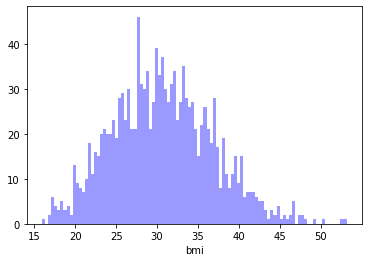

age distribution is:
18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64


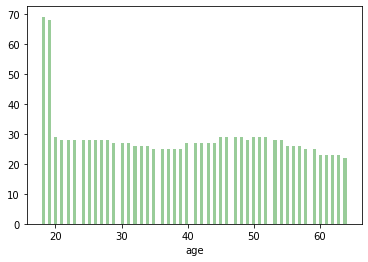

charges distribution is:
1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64


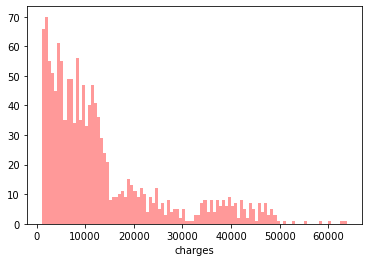

In [2]:
#3.c checking the prescence of missing values
df_att.isnull()
#3.d summary of numerical attributes
num_att=ins_df.describe()
print("numerical attributes are :")
print(num_att)
#3.e distribution of bmi,age and charges column along with plot
bmi_dist = ins_df['bmi'].value_counts()
print("bmi distribution is:")
print(bmi_dist)
sns.distplot(ins_df['bmi'], kde=False, color='blue', bins=100)
plt.show()
age_dist = ins_df['age'].value_counts()
print("age distribution is:")
print(age_dist)
sns.distplot(ins_df['age'], kde=False, color='green', bins=100)
plt.show()
charges_dist = ins_df['charges'].value_counts()
print("charges distribution is:")
print(charges_dist)
sns.distplot(ins_df['charges'], kde=False, color='red', bins=100)
plt.show()

In [3]:
#3.f skewness measurement of bmi,age and charges column
bmi_skew = ins_df['bmi'].skew(skipna=None, level=None, numeric_only=None)
print("bmi skew is:")
print(bmi_skew)
age_skew = ins_df['age'].skew(skipna=None, level=None, numeric_only=None)
print("age skew is:")
print(age_skew)
charges_skew = ins_df['charges'].skew(skipna=None, level=None, numeric_only=None)
print("charges skew is:")
print(charges_skew)

bmi skew is:
0.2840471105987448
age skew is:
0.05567251565299186
charges skew is:
1.5158796580240388


bmi_outlier is : 
(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)
age_outlier is :
(array([], dtype=int64),)
number of charges_outlier is :
(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
         82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
        203,  223,  240,  242,  251,  252,  254,  256,  263,  265,  271,
        281,  288,  292,  298,  312,  314,  322,  327,  328,  330,  338,
        373,  377,  381,  420,  421,  422,  441,  476,  488,  500,  524,
        530,  543,  549,  558,  569,  577,  587,  609,  615,  621,  623,
        629,  665,  667,  668,  674,  677,  682,  689,  697,  706,  725,
        736,  738,  739,  742,  759,  803,  819,  826,  828,  842,  845,
        850,  852,  856,  860,  883,  893,  901,  917,  947,  951,  953,
        956,  958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062,
       1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146,
       1152, 1156, 1186, 1

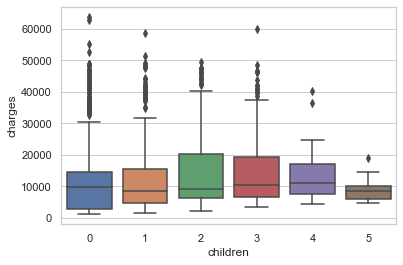

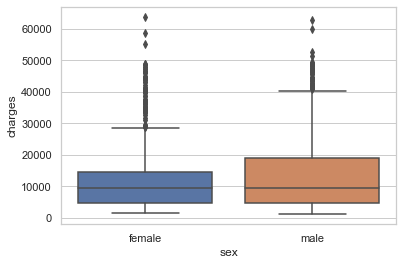

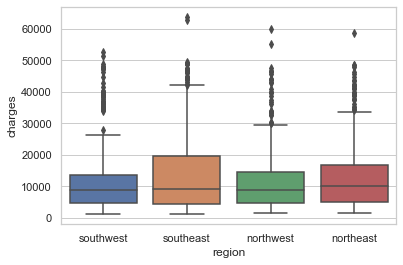

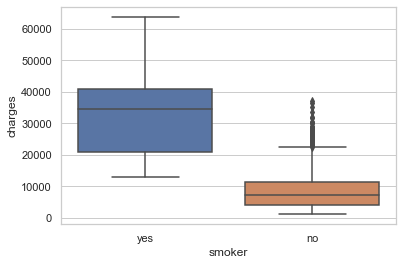

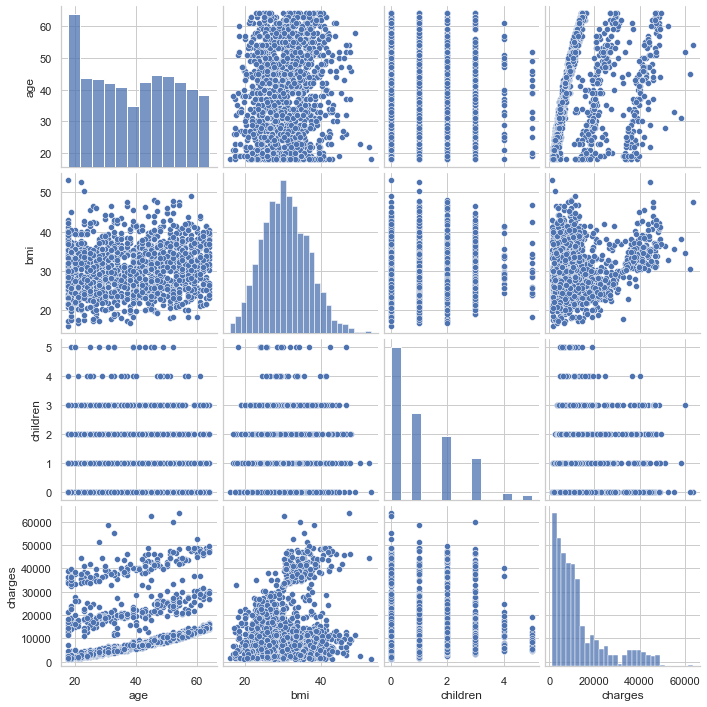

In [4]:
#3.g outlier determination function using interquartile range
def outlier(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1 -(1.5*IQR)
 upper_range = Q3 +(1.5*IQR)
 #return lower_range,upper_range
 return np.where((datacolumn > upper_range) | (datacolumn < lower_range))
#calling the function to determine bmi,age and charges outlier
bmi_outlier =outlier(ins_df.bmi)
print("bmi_outlier is : ")
print(bmi_outlier)
age_outlier =outlier(ins_df.age)
print("age_outlier is :")
print(age_outlier)
charges_outlier =(outlier(ins_df.charges))
print("number of charges_outlier is :")
print(charges_outlier)
#3.h distribution of categorical columns
sns.set(style="whitegrid")
#distribution based on number of children
sns.boxplot(x='children', y='charges', data= ins_df)
plt.show()
#distribution based on sex
sns.boxplot(x='sex', y='charges', data= ins_df)
plt.show()
#distribution based on region
sns.boxplot(x='region', y='charges', data= ins_df)
plt.show()
#distribution based on smoking habit
sns.boxplot(x='smoker', y='charges', data= ins_df)
plt.show()
#3.i pair plot all columns
sns.pairplot(ins_df)  
plt.show()

<ipython-input-5-1d5df8a2def6>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  smokers_mean=ins_df.charges[ins_df.smoker=='yes', None].mean()
<ipython-input-5-1d5df8a2def6>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  nonsmokers_mean=ins_df.charges[ins_df.smoker=='no', None].mean()


mean insurance charge of smoker is:
32050.23183153284
mean insurance charge of non-smoker is:
8434.268297856204


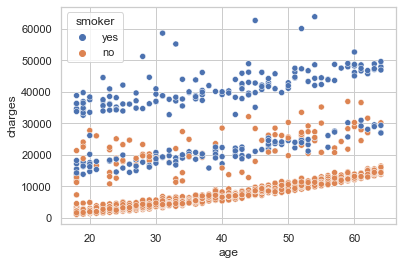

In [5]:
# 4.a calculation of mean of smokers,nonsmokers and scatter plot to show comparison of charges for smokers and non smokers
smokers_mean=ins_df.charges[ins_df.smoker=='yes', None].mean()
print("mean insurance charge of smoker is:")
print(smokers_mean)
nonsmokers_mean=ins_df.charges[ins_df.smoker=='no', None].mean()
print("mean insurance charge of non-smoker is:")
print(nonsmokers_mean)
sns.scatterplot(x='age', y='charges', data=ins_df, hue='smoker')
plt.show()

p_value is 8.271435842177219e-283
average male bmi is :
30.943128698224854
average female bmi is :
30.37774924471299


<ipython-input-6-ae035b3c00eb>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  male_bmi_mean= ins_df.bmi[ins_df.sex=='male',None].mean()
<ipython-input-6-ae035b3c00eb>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  female_bmi_mean= ins_df.bmi[ins_df.sex=='female',None].mean()


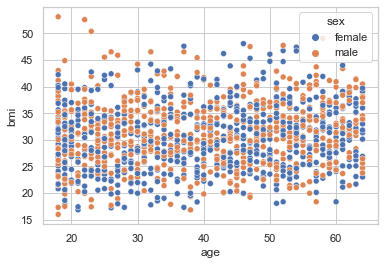

In [6]:
#The mean values and scatter plots  clearly show that smokers pay higher charges than nonsmokers
#proving using hypthesis testing
#H0 = smokers and non-smokers pay same charges
#Ha =smokers and non-smokers pay significantly different charges
smoker_charges= ins_df.charges[ins_df.smoker=='yes']
nonsmoker_charges= ins_df.charges[ins_df.smoker=='no']
#T test
t,p_value =stats.ttest_ind(smoker_charges,nonsmoker_charges)
print("p_value is", p_value)
#Since p_value is less than 0.05,we accept the alternate hypothesis that smokers pay significantly  higher charges than non-smokers

#4.b comparison of male female bmi and scatter plot to show comparison
male_bmi_mean= ins_df.bmi[ins_df.sex=='male',None].mean()
print("average male bmi is :")
print(male_bmi_mean)
female_bmi_mean= ins_df.bmi[ins_df.sex=='female',None].mean()
print("average female bmi is :")
print(female_bmi_mean)
sns.scatterplot(x='age',y='bmi', data=ins_df, hue='sex')
plt.show()

In [7]:
#both the mean values and scatterplot do not prove that bmi of males differ significantly from females hence  hypthesis testing is used
#H0 = male and female bmi do not differ significantly
#Ha =male and female bmi differ significantly
male_bmi=ins_df.bmi[ins_df.sex=='male']
female_bmi=ins_df.bmi[ins_df.sex=='female']
#using T test
t,p_value =stats.ttest_ind(male_bmi,female_bmi)
print("p_value is", p_value)
#since p_value is more than 0.05 we accept the null hypothesis than male and female bmi do not differ significantly
#4.c as we have to find if there is a relationship between the proportion of smokers of different genders,chi square test is used.
#H0=smoking habits are same for males and females
#Ha= smoking habits are different for males and females
prop_smoker=pd.crosstab(ins_df['sex'] ,ins_df['smoker'])
chi2,p,dof,expected =  stats.chi2_contingency(prop_smoker)
print(p)
#Since p_value is less than 0.05 we accept the alternate hypothesis that smoking habits are different for males and females
#4.d As we have to conduct hypothesis test for more than 2 values,ANOVA can be used
#H0= number of children doesnt affect bmi
#Ha= number of children affects bmi
female_df =ins_df[ins_df['sex']=='female' ]
female_0= female_df[female_df.children == 0]['bmi']
female_1= female_df[female_df.children == 1]['bmi']
female_2= female_df[female_df.children == 2]['bmi']
fstat= stats.f_oneway(female_0,female_1,female_2)
print(fstat)
#since p value is greater than 0.05,we accept the null hypothesis that number of children doesnt affect bmi

p_value is 0.08997637178984932
0.006548143503580696
F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)
